In [43]:
import numpy as np
import pandas as pd

In [44]:
data=pd.read_csv('emails.csv')

In [45]:
data.shape

(5172, 3002)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#columns
total_mails=data.shape[0]
total_mails

5172

In [48]:
train_test_cutoff=int(len(data)*0.8)
train_data=data[:train_test_cutoff]
test_data=data[train_test_cutoff:]
print(train_data.shape)
print(test_data.shape)

(4137, 3002)
(1035, 3002)


In [49]:
prob_spam=train_data['Prediction'].value_counts()[1]/train_data.shape[0]
prob_ham=train_data['Prediction'].value_counts()[0]/train_data.shape[0]
print(prob_spam)
print(prob_ham)

0.2866811699299009
0.7133188300700991


In [50]:

spam_data=train_data[train_data['Prediction']==1]
ham_data=train_data[train_data['Prediction']==0]
total_spam=spam_data.shape[0]
total_ham=ham_data.shape[0]
#Laplace smoothing
alpha=1
#new mail in each category spam and ham with all features 1
new_mail_spam=spam_data.shape[1]-1
new_mail_ham=ham_data.shape[1]-1



In [51]:
#Laplace smoothing
alpha=1
#new mail in each category spam and ham with all features 1
vocab_size = len(train_data.columns)-2 # Assuming the last column is the prediction

# Initialize word counts for spam and ham
word_counts_spam = np.ones(vocab_size+2) * alpha  # Laplace smoothing
word_counts_ham = np.ones(vocab_size+2) * alpha  # Laplace smoothing
print(word_counts_spam)
print(word_counts_ham)
#add one more row in spam and ham data
#word_count_spam & ham as the new mail
spam_data=pd.concat([spam_data,pd.DataFrame([word_counts_spam],columns=spam_data.columns)])
ham_data=pd.concat([ham_data,pd.DataFrame([word_counts_ham],columns=ham_data.columns)])
ham_data=ham_data.reset_index(drop=True)
spam_data=spam_data.reset_index(drop=True)
ham_data.iloc[-1,-1]=0
spam_data.iloc[-1,0]='Laplace smoothing'
ham_data.iloc[-1,0]='Laplace smoothing'
print(spam_data)
print(ham_data)

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
              Email No.   the    to   ect   and   for    of      a   you  hou  \
0               Email 6   4.0   5.0   1.0   4.0   2.0   3.0   45.0   1.0  0.0   
1               Email 8   0.0   2.0   2.0   3.0   1.0   2.0   21.0   6.0  0.0   
2              Email 17   3.0   1.0   2.0   2.0   0.0   1.0   17.0   0.0  0.0   
3              Email 18  36.0  21.0   6.0  14.0   7.0  17.0  194.0  25.0  5.0   
4              Email 26  12.0  53.0   2.0  14.0  18.0  14.0  287.0   0.0  2.0   
...                 ...   ...   ...   ...   ...   ...   ...    ...   ...  ...   
1182         Email 4128  73.0  52.0  23.0  30.0  26.0  55.0  422.0   7.0  3.0   
1183         Email 4132   3.0   4.0   2.0   1.0   1.0   1.0   13.0   3.0  0.0   
1184         Email 4135  39.0  28.0  12.0  38.0  11.0  27.0  326.0   6.0  1.0   
1185         Email 4137  37.0  32.0  14.0  28.0  19.0  34.0  332.0   7.0  1.0   
1186  Laplace smoothing   1.0   1.0   1.0   1.0   1.0   1.0  

In [52]:
spam_data.drop(columns=['Prediction'],inplace=True)
ham_data.drop(columns=['Prediction'],inplace=True)

In [53]:
numeric_spam_data = spam_data.drop(columns=['Email No.'])
numeric_ham_data = ham_data.drop(columns=['Email No.'])
print(numeric_spam_data)
print(numeric_ham_data)

       the    to   ect   and   for    of      a   you  hou     in  ...  \
0      4.0   5.0   1.0   4.0   2.0   3.0   45.0   1.0  0.0   16.0  ...   
1      0.0   2.0   2.0   3.0   1.0   2.0   21.0   6.0  0.0    2.0  ...   
2      3.0   1.0   2.0   2.0   0.0   1.0   17.0   0.0  0.0    1.0  ...   
3     36.0  21.0   6.0  14.0   7.0  17.0  194.0  25.0  5.0   59.0  ...   
4     12.0  53.0   2.0  14.0  18.0  14.0  287.0   0.0  2.0   86.0  ...   
...    ...   ...   ...   ...   ...   ...    ...   ...  ...    ...  ...   
1182  73.0  52.0  23.0  30.0  26.0  55.0  422.0   7.0  3.0  128.0  ...   
1183   3.0   4.0   2.0   1.0   1.0   1.0   13.0   3.0  0.0    4.0  ...   
1184  39.0  28.0  12.0  38.0  11.0  27.0  326.0   6.0  1.0   85.0  ...   
1185  37.0  32.0  14.0  28.0  19.0  34.0  332.0   7.0  1.0  115.0  ...   
1186   1.0   1.0   1.0   1.0   1.0   1.0    1.0   1.0  1.0    1.0  ...   

      enhancements  connevey  jay  valued  lay  infrastructure  military  \
0              0.0       0.0  0.0  

In [54]:
# sum of whole numeric spam data table
print(numeric_spam_data.values.sum())

1709048.0


In [55]:
print(numeric_spam_data.sum())

the               7201.0
to                8001.0
ect               2826.0
and               4575.0
for               3507.0
                   ...  
infrastructure      15.0
military            31.0
allowing             9.0
ff                1860.0
dry                  9.0
Length: 3000, dtype: float64


In [56]:
#p_words_spam
print(vocab_size)
print(np.arange(1,vocab_size+2))

  #p_words_spam.append((spam_data.iloc[:,i].sum())/(spam_data.sum()))
p_words_spam=((numeric_spam_data.sum())/(numeric_spam_data.values.sum()))
p_words_ham=((numeric_ham_data.sum())/(numeric_ham_data.values.sum()))
q_words_spam=1-p_words_spam
q_words_ham=1-p_words_ham
print(q_words_spam)
print(q_words_ham)
log_p_words_spam=np.log(p_words_spam)
log_p_words_ham=np.log(p_words_ham)
log_q_words_spam=np.log(q_words_spam)
log_q_words_ham=np.log(q_words_ham)
print(log_p_words_spam)
print(log_p_words_ham)

3000
[   1    2    3 ... 2999 3000 3001]
the               0.995787
to                0.995318
ect               0.998346
and               0.997323
for               0.997948
                    ...   
infrastructure    0.999991
military          0.999982
allowing          0.999995
ff                0.998912
dry               0.999995
Length: 3000, dtype: float64
the               0.993636
to                0.994468
ect               0.993015
and               0.997547
for               0.996882
                    ...   
infrastructure    0.999998
military          0.999999
allowing          0.999996
ff                0.999327
dry               0.999993
Length: 3000, dtype: float64
the               -5.469472
to                -5.364125
ect               -6.404829
and               -5.923085
for               -6.188931
                    ...    
infrastructure   -11.643397
military         -10.917460
allowing         -12.154222
ff                -6.823115
dry              -12.154222

In [57]:
test_data_label=test_data['Prediction']
test_df=test_data.drop(columns=['Prediction','Email No.'])

In [58]:
P_test_spam_proba=[]
P_x_given_y_spam=0
for i in range(test_df.shape[0]):
  for j in range(test_df.shape[1]):
    if test_df.iloc[i,j]==0:
      P_x_given_y_spam+=log_q_words_spam.iloc[j]
    else:
      P_x_given_y_spam+=log_p_words_spam.iloc[j]
  P_test_spam_proba.append(P_x_given_y_spam)
  P_x_given_y_spam=0
print(P_test_spam_proba)

[-947.2370067951247, -350.438704766735, -322.49122007179056, -350.438704766735, -208.45113313625976, -995.795735146549, -1852.3371068659694, -690.6153251836406, -622.2846759884361, -556.5992215618078, -271.98292406715916, -556.5992215618078, -271.98292406715916, -1820.2109587180269, -267.207542478143, -1820.2109587180269, -1069.6399085844994, -1069.6399085844994, -447.32088519222793, -447.32088519222793, -975.1376819838891, -1528.5837008507892, -975.1376819838891, -184.65595663073466, -1528.5837008507892, -2057.7132867250016, -2019.7476449852072, -271.98292406715916, -158.19476889800936, -271.98292406715916, -2320.5680684498757, -703.5923019463892, -2320.5680684498757, -703.5923019463892, -1139.0421982224882, -1143.533831285817, -798.337587222119, -1065.0438825559481, -798.337587222119, -1143.533831285817, -323.40380861949893, -236.59550842949616, -892.800770135305, -892.800770135305, -1354.5537649415203, -271.98292406715916, -1354.5537649415203, -271.98292406715916, -615.3779091788568

In [59]:
P_test_ham_proba=[]
P_x_given_y_ham=0
for i in range(test_df.shape[0]):
  for j in range(test_df.shape[1]):
    if test_df.iloc[i,j]==0:
      P_x_given_y_ham+=log_q_words_ham.iloc[j]
    else:
      P_x_given_y_ham+=log_p_words_ham.iloc[j]
  P_test_ham_proba.append(P_x_given_y_ham)
  P_x_given_y_ham=0
P_test_ham_proba+=np.log(prob_ham)
P_test_spam_proba+=np.log(prob_spam)
print(P_test_ham_proba)

[ -890.50180187  -339.97884209  -318.59022544 ...  -522.79015193
 -1290.13394654 -2662.94792722]


In [60]:
prediction_final=[]
for i in range(len(P_test_spam_proba)):
  if P_test_spam_proba[i]>P_test_ham_proba[i]:
    prediction_final.append(1)
  else:
    prediction_final.append(0)
print(prediction_final)
print(test_data_label.values)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 

0.936231884057971
0.8563218390804598
0.9490445859872612
0.9003021148036254
[[671  50]
 [ 16 298]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       721
           1       0.86      0.95      0.90       314

    accuracy                           0.94      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.94      0.94      0.94      1035



Text(95.72222222222221, 0.5, 'Truth')

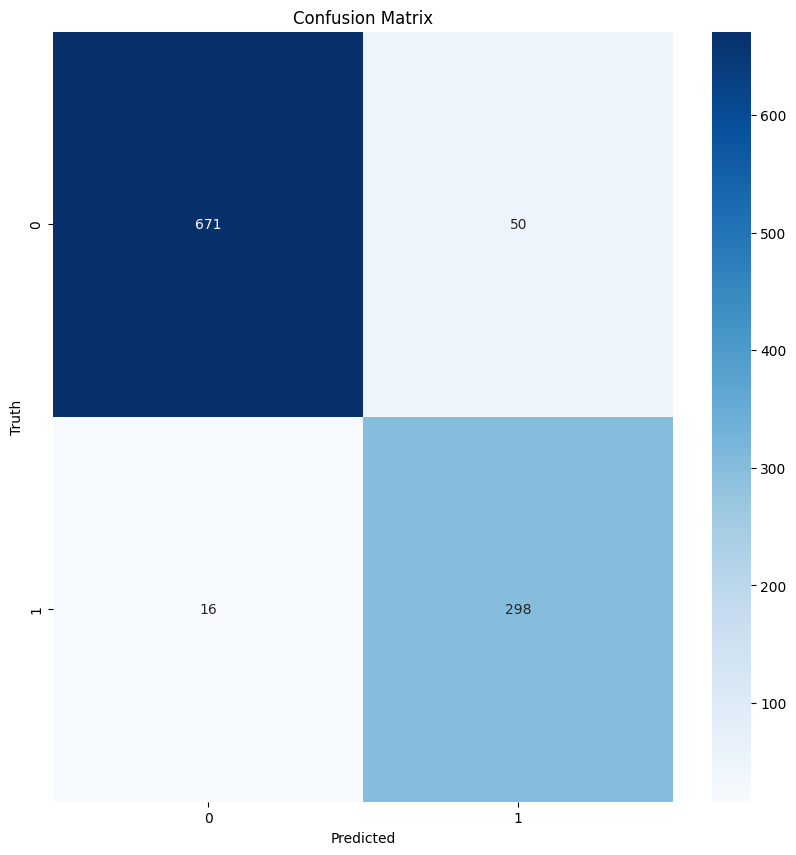

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
print(accuracy_score(test_data_label,prediction_final))
print(precision_score(test_data_label,prediction_final))
print(recall_score(test_data_label,prediction_final))
print(f1_score(test_data_label,prediction_final))
print(confusion_matrix(test_data_label,prediction_final))
print(classification_report(test_data_label,prediction_final))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(test_data_label,prediction_final),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')